In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt  

In [2]:
data = pd.read_csv('./all_gene_tpm.csv',sep=',',index_col=0)
data

,WT_Rep1,WT_Rep2,WT_Rep3,zmcyclin11-1_Rep1,zmcyclin11-1_Rep2,zmcyclin11-1_Rep3,zmcyclin11-2_Rep1,zmcyclin11-2_Rep2,zmcyclin11-2_Rep3
gene_id,,,,,,,,,
Zm00001d027230,4.418142,4.601132,8.988511,8.548703,6.976757,8.095077,9.477319,4.755507,9.371622
Zm00001d027233,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Zm00001d027231,4.224524,4.115662,3.889875,5.207622,3.368277,3.168563,5.406270,2.170225,5.722696
Zm00001d027236,9.558119,7.196721,5.123834,7.234697,10.193682,6.008419,10.235933,11.301225,9.464992
Zm00001d027234,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
Zm00001d000444,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Zm00001d000445,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Zm00001d000455,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [3]:
data1 = data.loc[~(data < 1).all(axis=1)]  
data1

,WT_Rep1,WT_Rep2,WT_Rep3,zmcyclin11-1_Rep1,zmcyclin11-1_Rep2,zmcyclin11-1_Rep3,zmcyclin11-2_Rep1,zmcyclin11-2_Rep2,zmcyclin11-2_Rep3
gene_id,,,,,,,,,
Zm00001d027230,4.418142,4.601132,8.988511,8.548703,6.976757,8.095077,9.477319,4.755507,9.371622
Zm00001d027231,4.224524,4.115662,3.889875,5.207622,3.368277,3.168563,5.406270,2.170225,5.722696
Zm00001d027236,9.558119,7.196721,5.123834,7.234697,10.193682,6.008419,10.235933,11.301225,9.464992
Zm00001d027239,89.727798,58.420544,77.004913,79.233452,88.173782,87.106003,98.217941,61.241856,92.893471
Zm00001d027250,1.842148,0.861025,4.229717,4.615558,5.699583,3.557812,2.589656,1.869050,4.351153
...,...,...,...,...,...,...,...,...,...
Zm00001d023206,0.000000,1.916434,0.000000,0.000000,0.618162,0.000000,0.000000,0.000000,0.566775
ZeamMp125,0.000000,0.000000,0.000000,0.000000,1.896418,0.000000,0.000000,0.000000,0.435373
Zm00001d000012,0.000000,0.000000,0.000000,0.000000,5.820400,0.000000,0.000000,0.000000,0.000000


In [5]:
# 设置阈值，例如超过2个小于1的值  
threshold = 4  
  
# 计算每行中小于1的值的数量  
count_less_than_one = data.apply(lambda row: (row < 1).sum(), axis=1)  
  
# 删除那些小于1的值的数量超过阈值的行  
df_filtered = data[count_less_than_one <= threshold]  
#df_filtered = df_filtered.drop('zmcyclin11-1_Rep2',axis = 1)
df_filtered

,WT_Rep1,WT_Rep2,WT_Rep3,zmcyclin11-1_Rep1,zmcyclin11-1_Rep2,zmcyclin11-1_Rep3,zmcyclin11-2_Rep1,zmcyclin11-2_Rep2,zmcyclin11-2_Rep3
gene_id,,,,,,,,,
Zm00001d027230,4.418142,4.601132,8.988511,8.548703,6.976757,8.095077,9.477319,4.755507,9.371622
Zm00001d027231,4.224524,4.115662,3.889875,5.207622,3.368277,3.168563,5.406270,2.170225,5.722696
Zm00001d027236,9.558119,7.196721,5.123834,7.234697,10.193682,6.008419,10.235933,11.301225,9.464992
Zm00001d027239,89.727798,58.420544,77.004913,79.233452,88.173782,87.106003,98.217941,61.241856,92.893471
Zm00001d027250,1.842148,0.861025,4.229717,4.615558,5.699583,3.557812,2.589656,1.869050,4.351153
...,...,...,...,...,...,...,...,...,...
ENSRNA049475878,0.000000,1.465560,0.000000,2.522606,2.624090,1.085397,1.769392,1.213804,1.148173
Zm00001d001398,0.000000,4.453709,5.263328,6.095920,1.366236,0.182760,4.657115,0.474662,2.098108
Zm00001d001309,0.000000,3.822236,0.846378,2.277350,0.000000,3.740714,0.000000,2.193730,1.701872


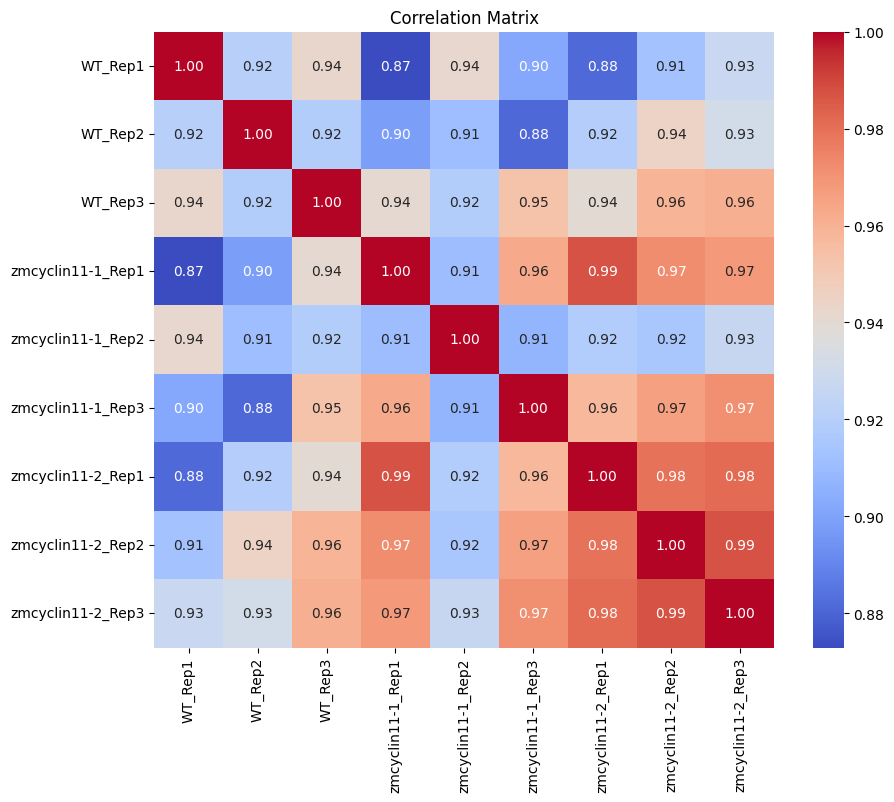

In [16]:
corr_matrix_filtered = df_filtered.corr()  
  
# 创建热图  
plt.figure(figsize=(10, 8))  # 你可以调整图的大小  
sns.heatmap(corr_matrix_filtered, annot=True, cmap='coolwarm', fmt=".2f")  # annot=True显示数值，cmap选择颜色映射，fmt设置数值格式  
plt.title('Correlation Matrix')  # 添加标题  
#plt.show()
plt.savefig("./correlationMatrixNoCluster.pdf", dpi=300, bbox_inches="tight")
plt.savefig("./correlationMatrixNoCluster.tif", dpi=300, bbox_inches="tight")

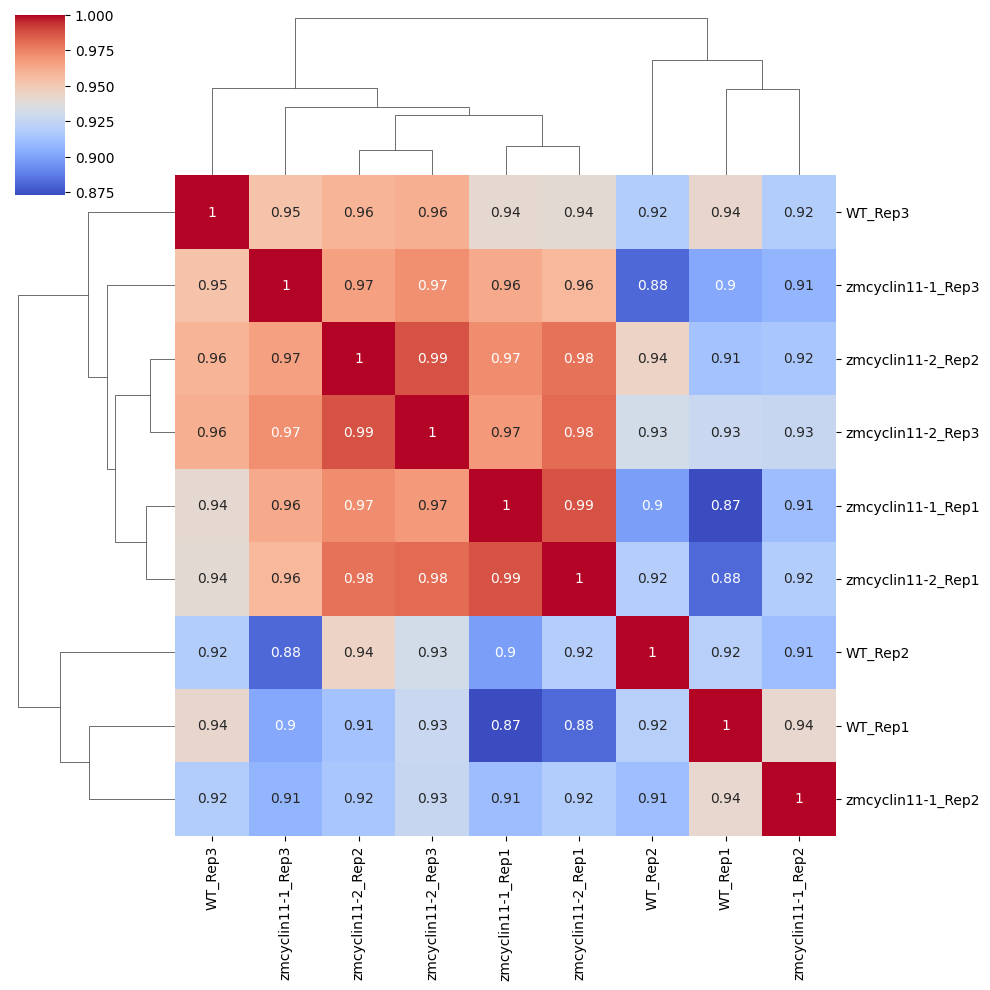

In [15]:
g = sns.clustermap(df_filtered.corr(), annot=True, cmap='coolwarm')  
  
# 显示图形  
#plt.show()
plt.savefig("./correlationMatrix.pdf", dpi=300, bbox_inches="tight")
plt.savefig("./correlationMatrix.tif", dpi=300, bbox_inches="tight")